# Importere libraries and packages

In [6]:


import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import json
import geojson
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import TimestampedGeoJson
import datetime
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt

%matplotlib inline

In [7]:
listings = pd.read_csv("listingseee.csv")


In [9]:
listingss = listings[['id','neighbourhood','host_is_superhost','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','price','host_since',
    'guests_included','minimum_nights','number_of_reviews','review_scores_rating','instant_bookable','cancellation_policy']]

- Prisen er i strengformat med dollar Fjern og konverter til float


In [10]:

listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)


# Konverter host_since fra streng til datetime

In [11]:

listings['host_since'] = pd.to_datetime(listings['host_since'])

# Opret en serie for at gruppere lister efter år og konverter til et dataframe

In [12]:

result = listings.groupby(listings['host_since'].map(lambda x: x.year)).id.count()
year = pd.DataFrame(result)

In [13]:

year.rename(columns={'id':'listings'}, inplace=True)
year = pd.DataFrame(year).reset_index()

- Opret en ny kolonne med de kumulative Airbnb listing efter år

In [ ]:

year['total listings']= year['listings'].cumsum(axis=0)

- Konverter host_since datatype til int

In [15]:
year['host_since'] = year['host_since'].astype(int)

- Omdøb kolonne host_since til år
- Derefter plot Airbnb Listings fra 2008-2019


In [16]:

year.rename(columns={'host_since':'year'}, inplace=True)

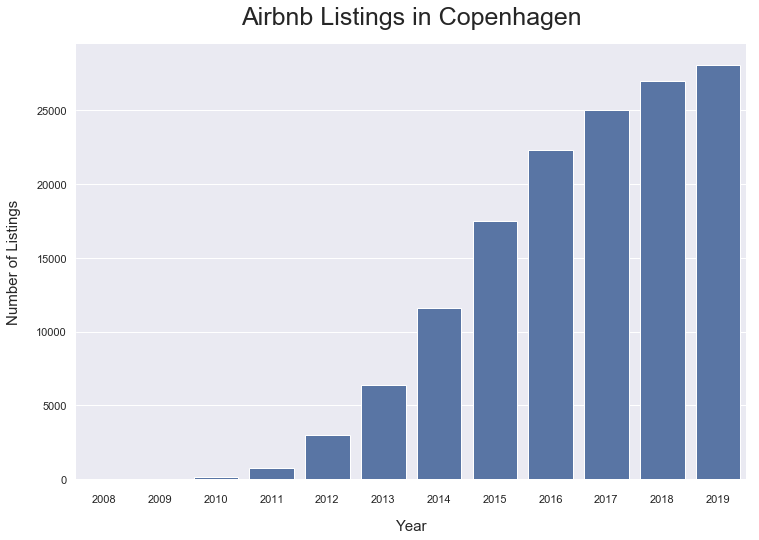

In [17]:

sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="total listings", data=year, color='b')
ax.set_title('Airbnb Listings in Copenhagen',fontsize=25,pad=20) 
ax.set_xlabel('Year',fontsize=15, labelpad=15)
ax.set_ylabel('Number of Listings',fontsize=15, labelpad=15) 
sns.despine(offset=5, left=True)

In [18]:
year

,year,listings,total listings
0,2008,1,1
1,2009,16,17
2,2010,158,175
3,2011,613,788
4,2012,2182,2970
5,2013,3432,6402
6,2014,5219,11621
7,2015,5896,17517
8,2016,4778,22295
9,2017,2726,25021


## Plot en Liste, der viser antallet af nye Airbnb Listings over tid 

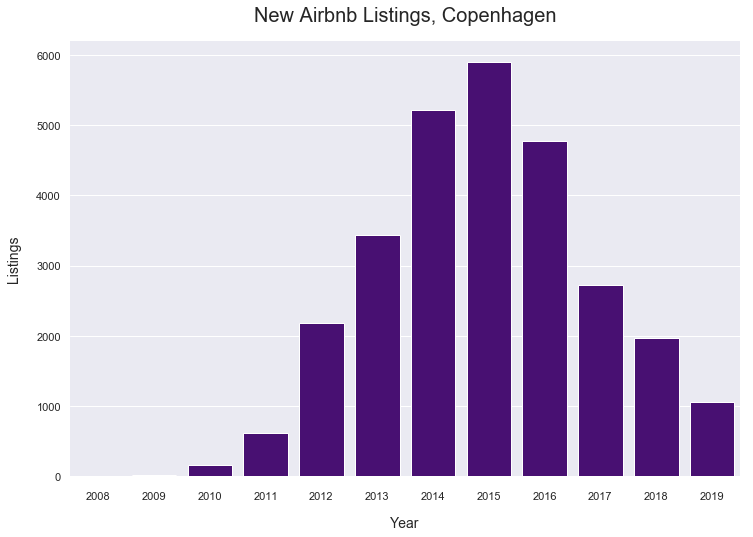

In [19]:

sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x='year', y="listings", data=year, color="indigo")
ax.set_title('New Airbnb Listings, Copenhagen',fontsize=20,pad=20) 
ax.set_xlabel('Year',fontsize=14, labelpad=15) 
ax.set_ylabel('Listings',fontsize=14, labelpad=15)
sns.despine(offset=5, left=True)

In [20]:
year

,year,listings,total listings
0,2008,1,1
1,2009,16,17
2,2010,158,175
3,2011,613,788
4,2012,2182,2970
5,2013,3432,6402
6,2014,5219,11621
7,2015,5896,17517
8,2016,4778,22295
9,2017,2726,25021


## Plot  room typerne  in København

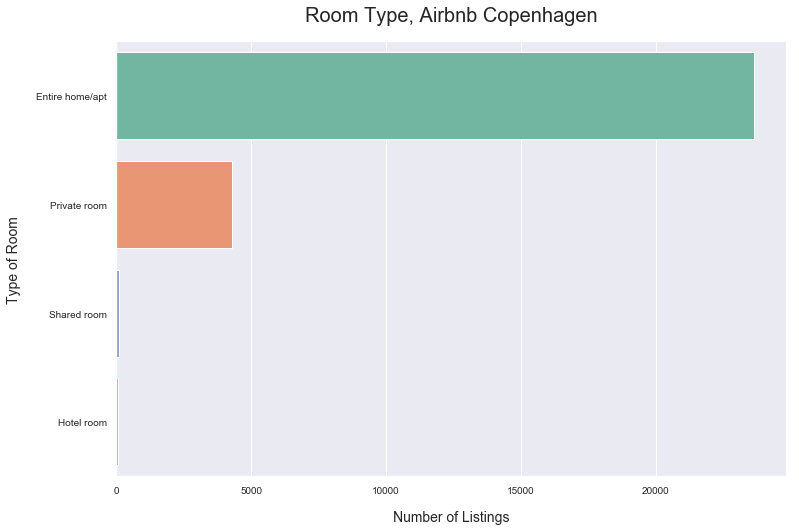

In [21]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.axes.set_title("Room Type, Airbnb Copenhagen",fontsize=20, pad=20)
ax = sns.countplot(y='room_type',data=listings,order=listings['room_type'].value_counts().index, palette="Set2")
ax.set_xlabel('Number of Listings',fontsize=14,labelpad=15)
ax.set_ylabel('Type of Room',fontsize=14,labelpad=15)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

In [22]:
listings['room_type'].value_counts()

Entire home/apt    23648
Private room        4287
Shared room           78
Hotel room            64
Name: room_type, dtype: int64

# Plot de mest populære neighbourhoods i København

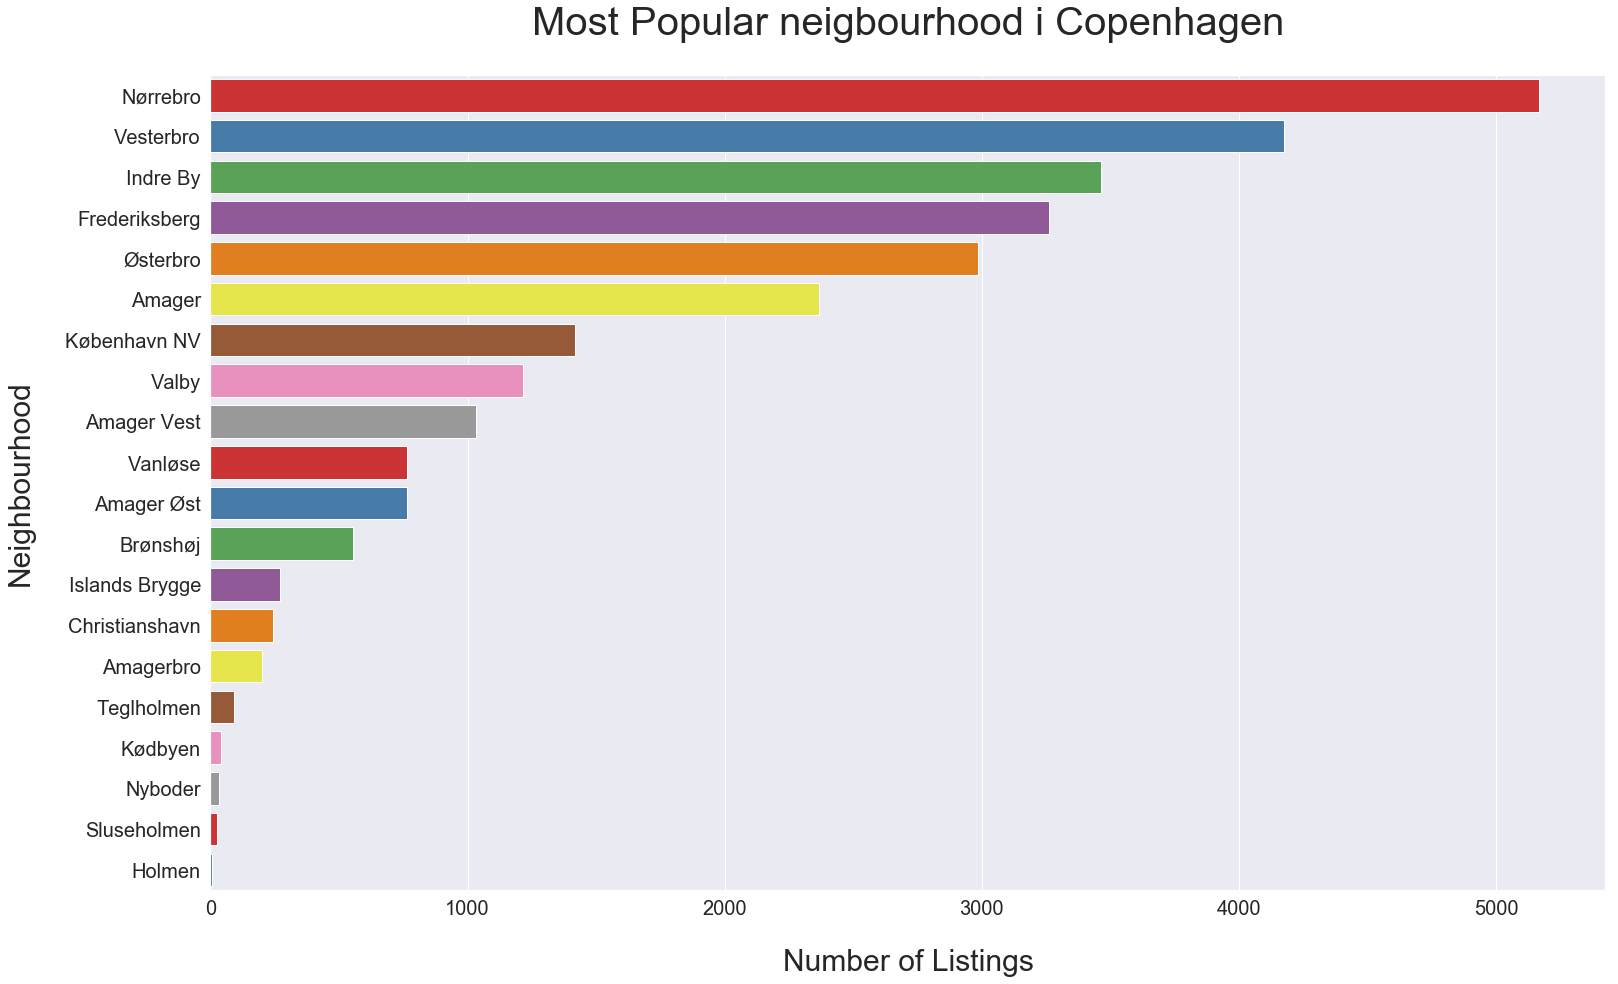

In [53]:

sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Most Popular neigbourhood i Copenhagen",fontsize=40,pad=40)
ax = sns.countplot(y='neighbourhood',data=listings, order = listings['neighbourhood'].value_counts().iloc[:20].index, palette="Set1")
ax.set_xlabel('Number of Listings',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [24]:
listings['neighbourhood'].value_counts()

Nørrebro          5167
Vesterbro         4176
Indre By          3463
Frederiksberg     3261
Østerbro          2985
Amager            2365
København NV      1417
Valby             1216
Amager Vest       1031
Vanløse            765
Amager Øst         763
Brønshøj           555
Islands Brygge     270
Christianshavn     242
Amagerbro          200
Teglholmen          92
Kødbyen             40
Nyboder             34
Sluseholmen         24
Holmen               7
Kastrup              2
Christiania          1
Name: neighbourhood, dtype: int64

## Implementere en Barplot over Room prisen i København
- Opret en liste over dyreste kvarterer i København med Airbnb lister
- Opret et dataframe til gruppering af kvarterer efter gennemsnitlig værelsespris
- 
- Barplot prisen af Københavns neighbourhood, 

In [25]:

top = listings['neighbourhood'].value_counts().iloc[:20].index.tolist()

In [26]:

price = pd.DataFrame(listings.groupby(['neighbourhood']).price.mean().reset_index())

top_price = price[price['neighbourhood'].isin(top)].sort_values('price',ascending=False)

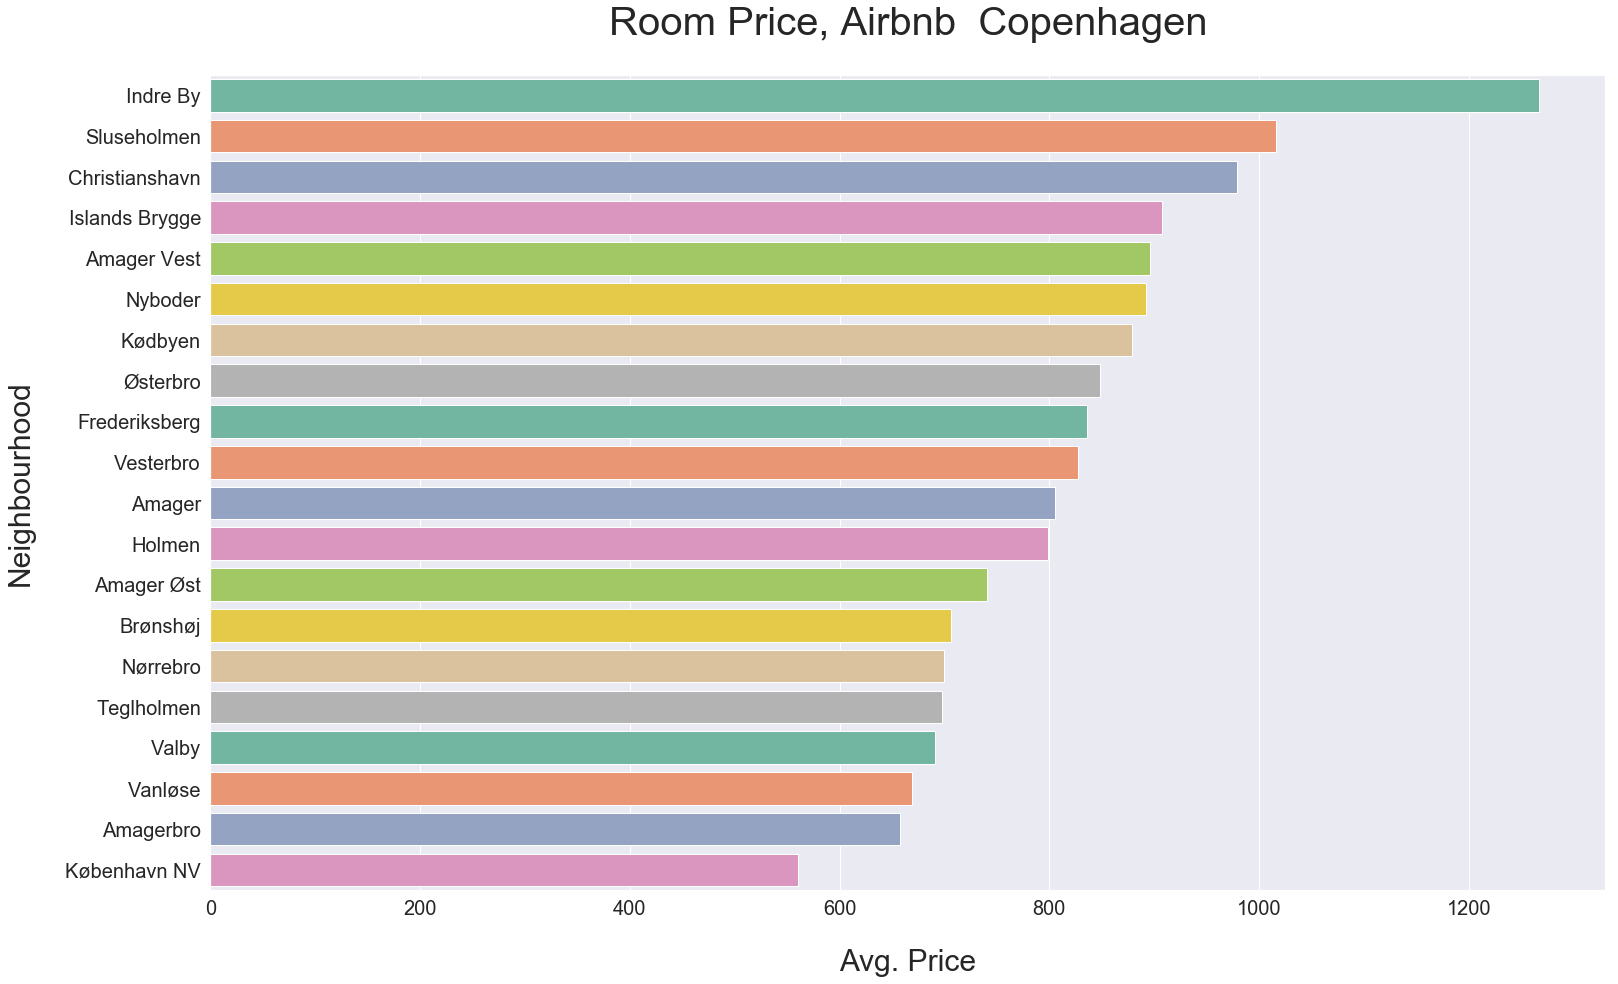

In [27]:

fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Room Price, Airbnb  Copenhagen",fontsize=40, pad=40)
ax = sns.barplot(x='price', y='neighbourhood',data=top_price, palette='Set2')
ax.set_xlabel('Avg. Price',fontsize=30,labelpad=30)
ax.set_ylabel('Neighbourhood',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [28]:
top_price

,neighbourhood,price
9,Indre By,1267.130234
16,Sluseholmen,1016.041667
6,Christianshavn,979.128099
10,Islands Brygge,907.292593
1,Amager Vest,896.492726
14,Nyboder,892.117647
13,Kødbyen,878.875000
21,Østerbro,848.872027
7,Frederiksberg,836.384545
20,Vesterbro,827.525383


In [31]:
# Rename column from date to review_date in the reviews data
reviews.rename(columns={'date':'review_date'}, 
                 inplace=True)

In [32]:
# Change data type to datetime
reviews['review_date'] = pd.to_datetime(reviews['review_date'])

In [33]:
# Create new columns for year, month and month year
reviews['month_year'] = reviews.review_date.dt.to_period('M')
reviews['year'] = reviews.review_date.apply(lambda x: x.year)
reviews['month'] = reviews.review_date.apply(lambda x: x.month)

In [34]:
# Create new dataframe to group reviews by year
reviews_year = pd.DataFrame(reviews.groupby(['year']).review_date.count().reset_index())

In [35]:
# Rename column from review_date to reviews
reviews_year.rename(columns={'review_date':'reviews'}, 
                 inplace=True)

In [36]:
# Create new column for bookings, estimate bookings by mupltiplying reviews by 2
reviews_year['bookings'] = reviews_year['reviews']*2

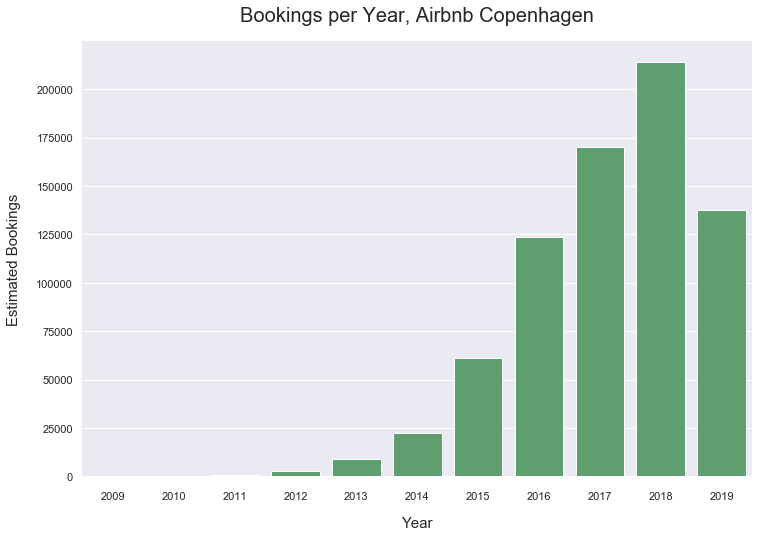

In [38]:
# Plot bookings per year
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="bookings", data=reviews_year, color='g')
ax.set_title('Bookings per Year, Airbnb Copenhagen',fontsize=20,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Estimated Bookings',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)

In [39]:
reviews_year

,year,reviews,bookings
0,2009,4,8
1,2010,35,70
2,2011,290,580
3,2012,1403,2806
4,2013,4520,9040
5,2014,11155,22310
6,2015,30643,61286
7,2016,61744,123488
8,2017,85109,170218
9,2018,106987,213974


In [40]:
# Merge reviews per year and listings per year
demand = year.merge(reviews_year, on='year')


In [41]:
# Create new columns for booked nights and available nights
demand['booked nights'] = demand['bookings']*2
demand['available nights'] = demand['total listings']*365

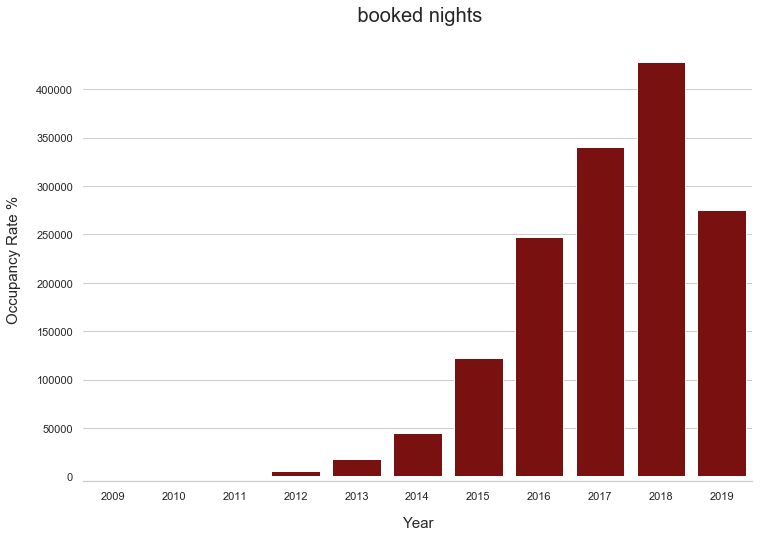

In [51]:
# Plot occupancy rate
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="year", y="booked nights", data=demand, color='darkredz')
ax.set_title(' booked nights',fontsize=20,pad=20) # Give the plot a main title
ax.set_xlabel('Year',fontsize=15, labelpad=15) # Set text for the x axis,
ax.set_ylabel('Occupancy Rate %',fontsize=15, labelpad=15)# Set text for y axis  
sns.despine(offset=5, left=True)


In [46]:
demand

,year,listings,total listings,reviews,bookings,booked nights,available nights
0,2009,16,17,4,8,16,6205
1,2010,158,175,35,70,140,63875
2,2011,613,788,290,580,1160,287620
3,2012,2182,2970,1403,2806,5612,1084050
4,2013,3432,6402,4520,9040,18080,2336730
5,2014,5219,11621,11155,22310,44620,4241665
6,2015,5896,17517,30643,61286,122572,6393705
7,2016,4778,22295,61744,123488,246976,8137675
8,2017,2726,25021,85109,170218,340436,9132665
9,2018,1973,26994,106987,213974,427948,9852810


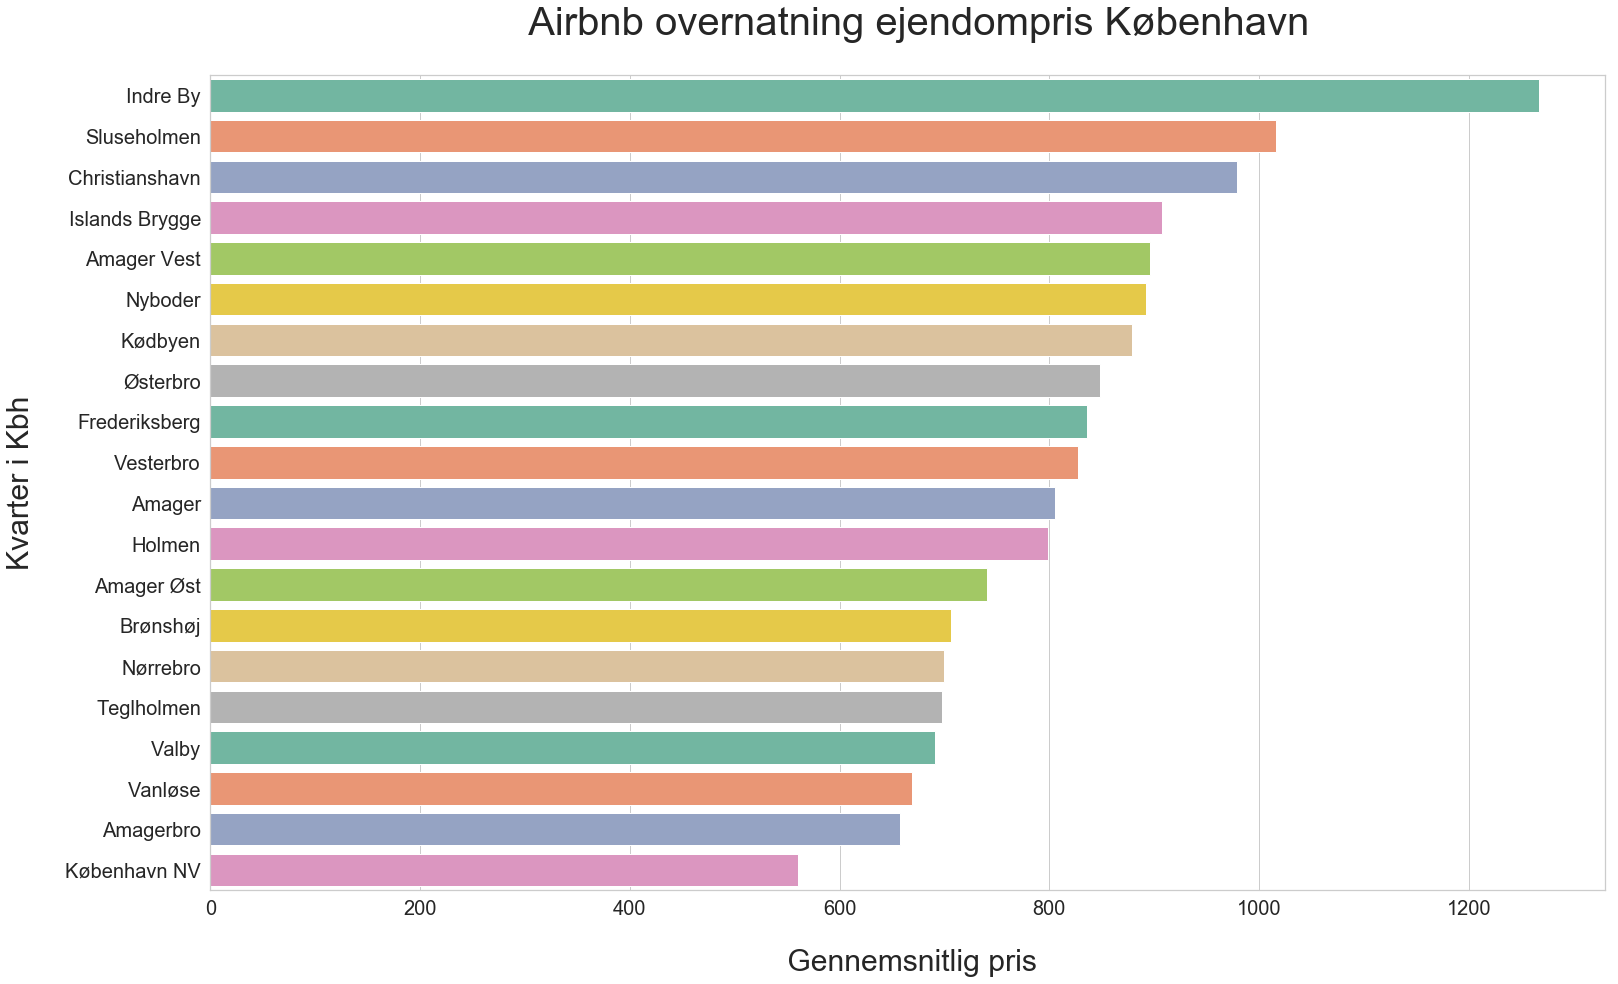

In [47]:
# Barplot of price by neighbourhood, top 20 neighbourhoods in terms of listings
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("  Airbnb overnatning ejendompris København",fontsize=40, pad=40)
ax = sns.barplot(x='price', y='neighbourhood',data=top_price, palette='Set2')
ax.set_xlabel(' Gennemsnitlig pris',fontsize=30,labelpad=30)
ax.set_ylabel('Kvarter i Kbh',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [48]:
top_price

,neighbourhood,price
9,Indre By,1267.130234
16,Sluseholmen,1016.041667
6,Christianshavn,979.128099
10,Islands Brygge,907.292593
1,Amager Vest,896.492726
14,Nyboder,892.117647
13,Kødbyen,878.875000
21,Østerbro,848.872027
7,Frederiksberg,836.384545
20,Vesterbro,827.525383
